<a href="https://colab.research.google.com/github/chaegeon/TIL/blob/master/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 통계
- 교재로는 챕터2 부터
- 예제는 교재 맽 앞 책표지뒤의 아래쪽 소스코드
  - 예제는 직접 다운로드
- 기본적으로는 교재를 바탕으로 수업할 건데, 확률분포를 직접하더라고. 수업에서 그건 라이브러리를 사용해서 할 것

- 통계란?
  - 관찰(수집)된 잘(현상/상태)에 대해서 통계적(수치적)으로 처리하고 연구
  - 기술통계와 추론통계

## 기술통계
- 기초통계를 이용해서 자료의 성질(특성)을 확인(설명)하는 것
- 자료의 요약된 정보
  - 자료의 자세한 정보까지는 확인할 수 없습니다.
    - 자료의 세세한 정봏까지 확인이 가능하면, 통계없이 확인가능한 정도로 아주 자근 파일
    - 즉, 빅데이터에서 아주아주 큰 파일에 대해서 확인할 수 있는 방법은 통계외에는 접근하는 방법조차 없다.
    - 자료의 아주 세세한 정보는 통곙에 있어서는 큰 관심사가 되지 않는다
  - 자료의 커다란 특성을 확인할 수 있다.
  - 통계가 아니고서는 대용량의 자료를 설명할 방법이 없다.


- 분석에 사용하는 기술적인 통계적 수치(통계량)
  - 중심에 대한 통계 ( 교재 2.1)
  - 산포에 대한 통계 ( 교재 2.2)
  - 관계에 대한 통계 ( 교재 3.1)
  - 형태에 대한 통계


 자료에 대한 평균

### 중심에 대한 통계
- 자료의 중심에 대한 경향을 나타내는 수치
- 중심성에 관한
- 평균 : 자료에 대한 평균(모평균/표본평균/샘플평균)
- 중앙값 : 자료의 50%에 해당하는 값
  - 자료를 정렬 했을 때, 가운데 오는 값
- 최빈값 : 가장 많이 등장하는 값


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/기초통계/ch2_scores_em.csv')
df.head(2)

,student number,english,mathematics
0,1,42,65
1,2,69,80


In [ ]:
# 학생 10명의 영어점수
# 를 넘파이로 바꿔서 배열로 보
scores = np.array( df['english'][:10] )
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [ ]:
# 평균구하기
sum(scores) / len(scores)

55.0

In [ ]:
# 넘파이의 mean은 평균을 구함
np.mean( scores )

55.0

In [ ]:
# 판다스에서 평균
df['english'][:10].mean()

55.0

### 중앙값 구하기

In [ ]:
np.sort( scores)
# 가운데 오는 56, 57이 중앙값이 된다?

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
sort_scores = np.sort(scores)
sort_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
len(sort_scores) // 2

5

In [ ]:
size = len(sort_scores)
if size % 2 == 0:
  m0 = sort_scores[size//2-1]
  m1 = sort_scores[size//2]
  mid = (m0 + m1) / 2
  # 사이즈?가 짝수라면 딱 가운데 수가 없는 거잖아.
  # 그럼 가운데 수를 두개를 m0, m1로 정해서 이 평균값을 중앙값으로 정함
  # Ex). 1, 2, 3, 4, 5라면 중앙값이 3일텐데
  # 1, 2, 3, 4, 5, 6 이라면 가운데의 두 수인 3, 4의 평균을 중앙값으로 삼음
else :
  mid = sort_scores[ (size+1) // 2-1 ]


In [ ]:
mid
# 56 과 57의 평균으로 56.5를 나온 듯

56.5

In [ ]:
np.median(scores)

56.5

In [ ]:
df['english'][:10].median()

56.5

### 최빈값 구하기
- 넘파이에서는 최빈값을 구하는 함수가 없다.
- 시리즈는 있음




In [ ]:
# 시리즈 형태로 바꾸고 mode 로 값을 구하는 방법
pd.Series(scores). mode()


0    65
dtype: int64

In [ ]:
df['english'][:10].mode()

0    65
dtype: int64

### 산포에 대한 통계
- 자료의 변동성을 나타해는 수치
  - 자료들이 중심으로부터 얼마나 멀리 떨어져 있는가의 정도를 나타내는 수치
- 편차 : 관측(수집)된 값과 평균의 차이
  - 평균(중심)으로부터 얼마나 멀리 떨어져 있는가
- 변동 : 편차의 제곱합 (제곱해서 다 합친 값)
- 분산 : 변동을 데이터의 수로 나눈 값
- 표준편차 : 분산의 제곱근


### 편차구하기

In [ ]:
mean = np. mean(scores) # 평균 
diviation = mean - scores  # 디비에이션은 ( 평균 - 값 )
diviation

array([ 13., -14.,  -1.,  14.,  -2.,   7., -10.,   6., -10.,  -3.])

In [ ]:
# 위의 편차를 제곱해서 합친 값이 변동

### 변동 구하기

In [ ]:
variation = np.sum(diviation ** 2 ) # 제곱하는 경우는 부호를 없애거나
variation      # +13 이나 -14나 멀리 떨어진 건 같은데, 0이 나오면 차이가 없다는 뜻이 나와버리니까
              # 부호를 없애는 것

860.0

In [ ]:
# 넘파이가 분산을 구하는 방식
variation / len(scores)


86.0

In [ ]:
# 시리즈나 프레임이 분산을 구하는 방식?
variation / ( len(scores) - 1 ) # -1 을 자유로라고 해석하기도 하고..
# 표본과 모집단 사이의 차이를 줄이기 위한 방편
# 일반적으로 표본에서 말하는 분산은 -1 한 분산이라고 보면 될 듯

95.55555555555556

In [ ]:
np.var(scores)

86.0

In [ ]:
# 파라미터로 조절
np.var(scores, ddof = 1)

95.55555555555556

In [ ]:
df['english'][:10].var()

95.55555555555556

In [ ]:
# 이것도 파라미터로 조절 가능
df['english'][:10].var(ddof=0)

86.0

### 표준편차 구하기
- 분산에 루트를 씌운 것

In [ ]:
np.std(scores)

9.273618495495704

In [ ]:
df['english'][:10].std()

9.775252199076787

판다스는 이러한 통계값을 한번에 계산할 수 있다.
- describe를 통해

In [ ]:
df['english'][:10].describe()
#개수, 평군, 표준편차, 최소최대 값 등등
# 근데 median. 최빈값은 없네

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
Name: english, dtype: float64

### 표준화와 편차
- 일반적인 표준화는
  - 데이터에서 평균을 빼고, 표준편차러 나누는 작업
    - 자료들이 서로 다른 분포를 가지고 있다면, 비교작업이 어렵기 때문에
    - 단점은
      - 자료들이 정규분포임이 가정. 아니라면 최선이 아닐 수 있음
    - 장점은 평균이나 분산에 상관없이 표준화된 지표를 얻을 수 있다.
- 다른 방법은
  - 최소/최대로 스케일링 하는 방법
  - Robust 등

In [ ]:
z = (scores-mean) / np.std(scores)
z # 표준화된 데이터
#평균이 0이고, 편차는 +- 1이 된다.

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

평균은 0이고, 편차는 1이 된다.

In [ ]:
np.mean(z), np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

편차값
- 편균이 50, 표준편차가 10이 되도록 정규화
- 편차값이 50이면 평균적인 결과
- 50보다 클 수록 상위 결과라는 의미로 해석

In [ ]:
z = 50 + 10 * (scores-mean) / np.std(scores)
z
# 첫번째는 평균보다 훨씬 낮구나
# 두번째는 평균보다 높은 점수를 냈구나
# 3번째는 거의 뭐 평균이구나
# 이런 식으로 해석 가능

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

### 관계에 대한 통계
- 자료와 자료같의 관게를 낱타내는 수치
  - 수치일 뿐, 실제 관계를 수치만 가지고 정확하게 표현할 수 없다.
  - 수치를 가지고 해석하는 것은 분석하는 사람의 몫
- 2변수

1. 상관관계
- 공분산(Co-variance)
- 두 변수 사이의 분산을 보는 것
  - 결과적으로 두 변수의 분산이 같이 커지거나, 작아지면 상관성이 있다라고 해석
  - 혹은 반대로, 분산이 커지는데 반대로 작아지거나, 분산이 작아지는데 반대로 커지거나 상관성이 있다고 해석

- 공분산의 해석은 다음과 같다
  - **cov > 0** : x가 큰값(혹은 작은값)을 가질 때, y도 큰값(혹은 작은값)을 가지는 경우
    - x의 분산이 커질 때, y의 분산 또한 커지는 경우
    - x의 분산이 작아질 때, y의 분산이 같이 작아지는 경우
    - 두 변수를 곱하면 양수가 나옴
    - 즉, x와 y사이에 양의 상관성이 있다고 해석
  - **cov < 0** : x와 y가 반대인 경우
    - x의 분산이 작아질 떄, y의 분산이 커지거나
    - x의 분산이 커질 때, y의 분산이 작아지거나
    - 한 쪽이 양수 일 때 다른 한쪽은 음수니까 곱하면 음수가 나옴
    - 이런 경우에는 x와 y의 사이에 음의 상관성이 있다로 해석
  - **cov = 0** 인 경우 (0에 가까울 경우)
    - x의 분산과 상관없이 y가 존재하는 경우(그 반대도 마찬가지)
    - 음수와 양수가 섞이기 때문에 0에 가까운 값을 가지게 된다.
    - 두 변수는 상관성이 적다라고 봄

- 단점
  - 두 변수 사이의 상관성이 낮아도, 수치가 크면 ,공분산 값이 크게 나올 수 있다.
  - 반대로 두 변수 사이의 상관서어ㅣ 높아도, 수치가 낮으면, 공분산 값은 작게 나올 가능성이 있다.
  - **상관계수** : 공분산의 값을 -1과 1 사이의 값으로 표준화한 값
    - -1 과 1에 가까울 수록 상관성이 높다고 해석
    - 0에 가까울 수록 상관성이 낮다고 해석


2. 인과관계
- 추론통계에서 확인하고자 하는 것이 인과성이 될 수 있다.
- 어떤 자료가 다른 자료의 원인이 되는 경우
  - 모든 변수가 무조건 원인이 될 수 있는 것은 아니다


In [ ]:
# 영어점수와 수학점수의 공분산을 계산
en_scores = np.array(df['english'][:10])
ma_scores = np.array(df['mathematics'][:10])

In [ ]:
cov = np.cov( en_scores, ma_scores, ddof =0 ) # 책 예제와 동일하게 하려면 ddof=0
cov

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [ ]:
np.corrcoef( en_scores, ma_scores)
# 상관이 있어보이네

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [ ]:
df[['english', 'mathematics']].corr()
# 상관이 있어보여

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


두 변수의 상관성을 확인하기 좋은 시각화 'pair_plot'을 이용해 볼 수 있다
- pait_plot은 변수가 많아지면, 굉장히 느려지기 때문에, 주의해야한다.


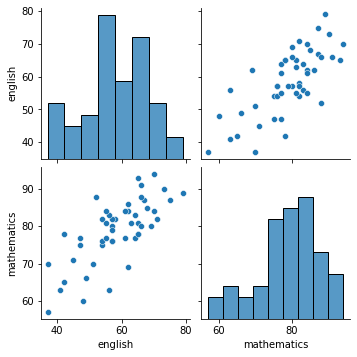

In [ ]:
sns.pairplot( df[['english', 'mathematics']] )

### 형태 통계
- 형태를 수치화한 것
- 자료의 분포나 왜곡된 형태
  - 왜도 : 편향. 중심을 기준으로 좌우의 데이터가 편향되어 있는 형태를 나타내는 수치
    - 왼쪽으로 차우쳐져 있다-> 꼬리가 오른쪽

  - 첨도 : 뾰족함의 정도
    - 뾰족한 게 높을 수록 자료가 중심으로 모여있는. ^


### 추론통계
- 표본을 통해서 모집단을 추론하는 과정
  - ( 모집단 : 우리가 알고자 하는 것 )
  
  1. population을 모집단이라고 보고
  2. 여기서 표본을 추출 - sample data
  3. 
  4. 추정

- 통계를 대하는 자세
  - 마크트웨인
    - 거짓말의 3가지 종류 : 거짓말 ,새빨간 거짓말, 통계
    - 통계가 모집단의 모든 특징을 전부 설명할 수는 없다.
  - 통계의 한계
    - 일단! 모집단의 특성을 표본을 통해서 통계로 설명한다는 것은 매우 괜찮은 생각이다
    - 표본의 특성이 꼭 모집단과 같을 거라는 보장이 없다.
      - 표본이 모집단을 대표하는 특성인자 아닌지, 알 수 있는 방법도 없다.
      - 누구도 알 수 없다.
    - 표본을 통해서 모집단의 평균을 알 수 없지만, 추론(추측, 추정)은 가능하다
      - 추측이니까.. 99%의 확률로 맞을 수도 있지만 , 1%의 확률로 틀릴 가능성 또한 반드시 존재
  - 모집단을 알 수 없다.
    - 모집단은 시간이 지나면서 변하기 때문에

    - 일반적으로 ML/DL에서 하려는 건 과거의 데이터를 이용해서 현재나, 미래를 설명하고 싶은건데(이게 말이 되는가?)

- 이후에 수업시간에 얘기하는 확률과 통계는 모집단을 가정하고 진행


- 하지만 우리는 통계를 사용하지 않을 수는 없다.
  - 통계가 아니고서는 대규모의 데이터를 해석할 수도, 설명할 수도 없다.
  - 자료간의 다소의 차이는 있겠지만, 공통적인 특징은 확인할 수 있다.




## 모집단과 표본


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/기초통계/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

복원 추출과 비복원 추출

In [ ]:
np.random.choice(scores, 20)
# 중복가능 - 복원추출

array([56, 84, 38, 84, 80, 58, 74, 72, 62, 87, 71, 87, 41, 68, 86, 54, 72,
       61, 67, 62])

In [ ]:
np.random.choice(scores, 20, replace=False)
# 중복되지 않는 - 비복원 추출

array([ 63,  58, 100,  92,  63,  54, 100,  84,  42,  63,  80,  55,  68,
        70,  78,  83,  63,  90,  86,  52])

In [ ]:
for i in range(5):
  sample = np.random.choice(scores, 20)
  print('{}번째 무작위 추출 얻은 표본 평균: {}'. format( i+1, sample.mean()))

1번째 무작위 추출 얻은 표본 평균: 63.65
2번째 무작위 추출 얻은 표본 평균: 75.85
3번째 무작위 추출 얻은 표본 평균: 73.25
4번째 무작위 추출 얻은 표본 평균: 62.25
5번째 무작위 추출 얻은 표본 평균: 67.4


In [ ]:
# 실제 모집단의 평균
scores.mean()

69.53